# Whole-Brain Models, Parte 1

Modified version of the Jansen & Rit model [1] with inhibitory synaptic plasticity [2].
Two subpopulations of neural masses were used to simulate the neural activity of 
individual brain regions, according to [3].

Codes published in [4].

[1] Jansen, B. H., & Rit, V. G. (1995). Electroencephalogram and visual evoked
 potential generation in a mathematical model of coupled cortical columns. 
 Biological cybernetics, 73(4), 357-366.

[2] Abeysuriya, R. G., Hadida, J., Sotiropoulos, S. N., Jbabdi, S.,
Becker, R., Hunt, B. A., ... & Woolrich, M. W. (2018). A biophysical 
model of dynamic balancing of excitation and inhibition in fast 
oscillatory large-scale networks. PLoS computational biology, 14(2), 
e1006007.

[3] Otero, M., Lea-Carnall, C., Prado, P., Escobar, M. J., & El-Deredy, W. 
(2022). Modelling neural entrainment and its persistence: influence of 
frequency of stimulation and phase at the stimulus offset. Biomedical 
Physics & Engineering Express, 8(4), 045014. 

[4] Coronel‐Oliveros, C., Gómez, R. G., Ranasinghe, K., Sainz‐Ballesteros, A., 
Legaz, A., Fittipaldi, S., ... & Ibañez, A. (2024). Viscous dynamics associated 
with hypoexcitation and structural disintegration in neurodegeneration via 
generative whole‐brain modeling. Alzheimer's & Dementia.


@author: Carlos Coronel



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import JansenRitModelMulti as JR

plt.rcParams.update({'font.size': 16})


## The Jansen & Rit Model

The Jansen & Rit model is a computational model developed to simulate the electrical activity of the brain as measured by electroencephalography (EEG). This model is based on the theory that EEG signals are generated by the interactions between excitatory and inhibitory neuronal populations. The model was initially proposed by Ben Jansen and Vincent Rit in their seminal 1995 paper, which presented a mathematical framework to describe the macroscopic electrical activity of the brain.

### Model Structure

The Jansen & Rit model consists of three main interconnected neuronal populations:

1. **Pyramidal Neurons**: These serve as the main excitatory population and are influenced by both excitatory and inhibitory synaptic inputs.
2. **Excitatory Interneurons**: This population provides excitatory feedback to the pyramidal neurons.
3. **Inhibitory Interneurons**: This group provides inhibitory feedback to the pyramidal neurons.

These populations are modeled using differential equations that describe the average membrane potential dynamics of the neuronal populations. The model uses a set of parameters that influence the strength and timing of the interactions between these populations.

### Mathematical Formulation

The dynamics of each population are described using a second-order nonlinear differential equation, which captures the synaptic gating dynamics. The model includes:
- **Average Membrane Potentials**: Represented as deviations from a baseline state.
- **Synaptic Transmission Dynamics**: Modeled by sigmoid functions that transform the membrane potentials into average synaptic outputs.
- **Coupling Parameters**: These define the connectivity strengths between the excitatory and inhibitory populations.

### EEG Simulation

In the context of EEG simulations, the Jansen & Rit model generates output that resembles real EEG data under various conditions:
- **Background Activity**: The model can simulate the background EEG activity observed in a resting state.
- **Evoked Responses**: By modifying input parameters, the model can simulate the brain's response to external stimuli, mimicking evoked potentials measured in EEG.
- **Pathological Conditions**: Adjustments to the model can simulate conditions like epilepsy, showing how changes in neuronal dynamics might lead to abnormal EEG patterns.

### Significance and Applications

The Jansen & Rit model is significant because it provides a mechanistic insight into how macroscopic brain signals (like EEG) arise from microscopic neuronal interactions. It bridges the gap between neurophysiological processes and observable EEG patterns, offering a valuable tool for both research and educational purposes. This model has been extensively used to study brain function, test hypotheses in neuroscience, and develop better understanding and treatment approaches for neurological disorders.

Overall, the Jansen & Rit model stands out as a foundational computational tool in neuroscience, helping to decipher the complex dynamics of brain activity as represented through EEG.


<img src="Jansen&Rit.jpg" width="1000"/>

**Original Jansen & Rit model** Sanchez-Todo et al. (2018).


## Two subpopulations Jansen & Rit Model

This is a modified version of the model by Coronel-Oliveros et al. (2024, Alzheimer's and Dementia). Compared to the original, it incorporates two new key elements:

1. **Introduction of Synaptic Plasticity:**
   - The model includes inhibitory synaptic plasticity (ISP). The ISP a) help in keeping sustainied oscillation when nodes are coupled by a structural connectivity, b) can be used to control the E/I balance of pyramidal neurons, potentially moving the model towards hyper and hypoexcitability.
2. **Incorporation of an Additional Neural Subpopulation:**
   - Within a single cortical column, the model incorporates two cortical subpopulations, able to generate $\alpha$ and $\gamma$ EEG rhythyms.
  

<img src="Jansen&Rit_Mod.jpg" width="700"/>

**Modified Jansen & Rit model** Coronel-Oliveros et al. (2024).




# Setting model parameters and simulations (one node example)

In [10]:
#Simulations parameters
JR.tmax = 10 #max sim time
JR.teq = 4 #eq time for reaching steady-state dynamics
JR.dt = 0.001 #integration step
JR.downsamp = 1 #downsampling for reducing memory consumption

#networks parameters (ignore them for these simulations....)
JR.M = np.array([[0,0],
                 [0,0]])
JR.nnodes = len(JR.M) #number of nodes
JR.norm = 1 #normalization factor

#Noise an inputs
JR.sigma = 1 #noise scaling factor
JR.p = 220 * np.ones(JR.nnodes) #inputs for individual nodes

#Plasticity
JR.plasticity_on = 1 #1: activated, 0: disabled
JR.target = 3.5 * np.ones(JR.nnodes) #target firing rate in Hz #try 1.5, 2.5, 3.5
JR.tau_p = 2 #time constant for plasticity (in seconds)

#Proportion of alpha neurons
JR.alpha = 1 * np.ones(JR.nnodes)
JR.gamma = 1 - JR.alpha

#updating some parameters
JR.update() #avoid this in extensive simulations (call it increases memory consumption).
            #just use it one time before parallelization

#Simulation starts here
y, t = JR.Sim(verbose = True)
#Simulations end here

#EEG-like signals
EEG = (JR.alpha * y[:,1,:] + JR.gamma * y[:,7,:]) - (JR.alpha * y[:,2,:] + JR.gamma * y[:,8,:])

#Power spectrum using Welch 
freqs, PSDs = signal.welch(EEG, 1000//JR.downsamp, 'hann', 4000//JR.downsamp, 2000//JR.downsamp, axis = 0, scaling = 'density')
PSD = np.mean(PSDs, axis = 1)


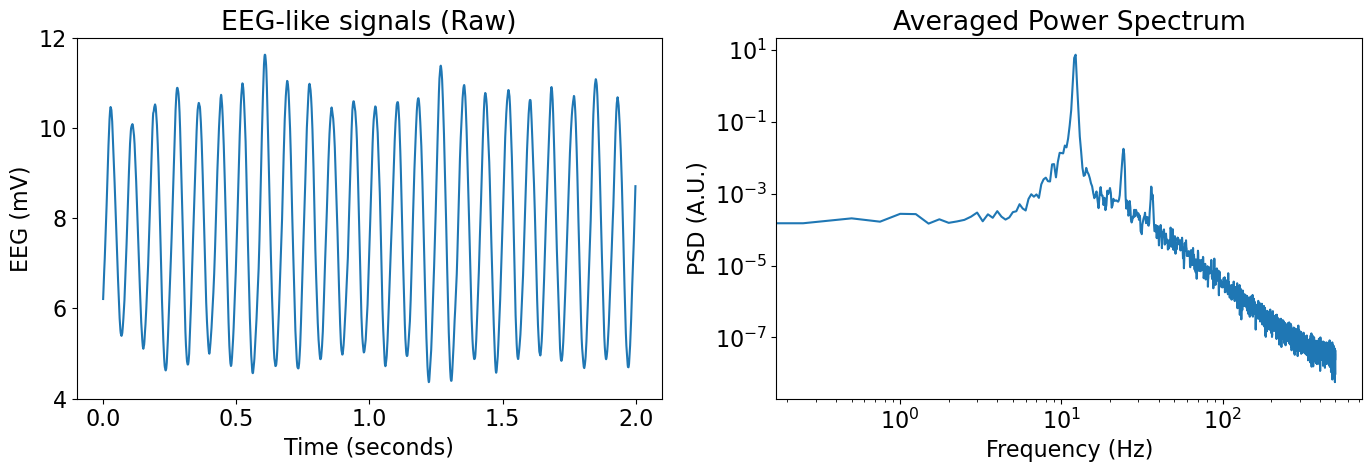

In [11]:
#Some examples of model's outputs

plt.figure(1, figsize = (14,5))
plt.clf()

plt.subplot(1,2,1)
plt.plot(t[:2000], EEG[:2000,0])
plt.xlabel('Time (seconds)')
plt.ylabel('EEG (mV)')
plt.title('EEG-like signals (Raw)')

plt.subplot(1,2,2)
plt.loglog(freqs,PSD)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (A.U.)')
plt.title('Averaged Power Spectrum')


plt.tight_layout()

        

In [12]:
#Frequency versus Pyramidal neurons' excitability

rE_vec = np.linspace(1.75,3.25,21) #Different pyramidal neurons' firing rates
freqs_vec = np.zeros_like(rE_vec) #To store the peak frequency of the signals

for i in range(0, 21):
    JR.target = rE_vec[i] * np.ones(JR.nnodes) #target firing rate in Hz

    #Simulation starts here
    y, t = JR.Sim(verbose = False)
    #Simulations end here

    #EEG-like signals
    EEG = (JR.alpha * y[:,1,:] + JR.gamma * y[:,7,:]) - (JR.alpha * y[:,2,:] + JR.gamma * y[:,8,:])

    #Power spectrum using Welch 
    freqs, PSDs = signal.welch(EEG, 1000//JR.downsamp, 'hann', 4000//JR.downsamp, 2000//JR.downsamp, axis = 0, scaling = 'density')
    PSD = np.mean(PSDs, axis = 1)
    
    #Get the peak frequency of EEG
    freqs_vec[i] = freqs[np.argmax(PSD)]
    
    print(i) #for impatient people...


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


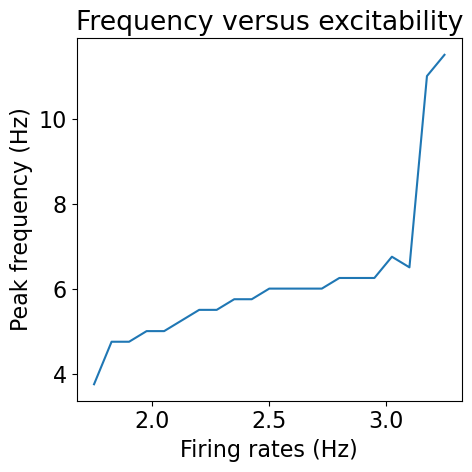

In [13]:
plt.figure(1, figsize = (5,5))
plt.clf()

plt.subplot(1,1,1)
plt.plot(rE_vec, freqs_vec)
plt.xlabel('Firing rates (Hz)')
plt.ylabel('Peak frequency (Hz)')
plt.title('Frequency versus excitability')

plt.tight_layout()

## Whole-brain model

In [16]:
#Simulations parameters
JR.tmax = 120 #max sim time
JR.teq = 20 #eq time for reaching steady-state dynamics
JR.dt = 0.001 #integration step
JR.downsamp = 10 #downsampling for reducing memory consumption

#networks parameters
JR.M = np.load('SC_HCs.npy') #SC matrix
JR.nnodes = len(JR.M) #number of nodes
JR.norm = 1 #normalization factor

#Noise an inputs
JR.sigma = 1 #noise scaling factor
JR.p = 220 * np.ones(JR.nnodes) #inputs for individual nodes

#Plasticity
JR.plasticity_on = 1 #1: activated, 0: disabled
JR.target = 2.5 * np.ones(JR.nnodes) #target firing rate in Hz
JR.tau_p = 2 #time constant for plasticity (in seconds)

#Global coupling
JR.K = 0.28

#Proportion of alpha neurons
JR.alpha = 0.5 * np.ones(JR.nnodes)
JR.gamma = 1 - JR.alpha

#updating some parameters
JR.update() #avoid this in extensive simulations (call it increases memory consumption).
            #just use it one time before parallelization

#Simulation starts here
y, t = JR.Sim(verbose = True)
#Simulations end here

#EEG-like signals
EEG = (JR.alpha * y[:,1,:] + JR.gamma * y[:,7,:]) - (JR.alpha * y[:,2,:] + JR.gamma * y[:,8,:])

#Power spectrum using Welch 
freqs, PSDs = signal.welch(EEG, 1000//JR.downsamp, 'hann', 4000//JR.downsamp, 2000//JR.downsamp, axis = 0, scaling = 'density')
PSD = np.mean(PSDs, axis = 1)

#FCs in different EEG frequency bands
FCs = np.zeros((82,82,5))
bands = [(0.5,4), (4,8), (8,13), (13,30), (30,40)]

#filtering and computing FC
for i in range(0, 5):
    fmin, fmax = bands[i][0], bands[i][1]
    a0,b0 = signal.bessel(3, 2 * JR.dt * JR.downsamp * np.array([fmin, fmax]), btype = 'bandpass')
    Vfilt = signal.filtfilt(a0, b0, EEG, 0)
    FCs[:,:,i] = np.corrcoef(Vfilt.T)

#And also the alpha band alone as an example
fmin, fmax = 8, 13
a0,b0 = signal.bessel(3, 2 * JR.dt * JR.downsamp * np.array([fmin, fmax]), btype = 'bandpass')
Vfilt = signal.filtfilt(a0, b0, EEG, 0) #Filtered EEG signals
FC = np.corrcoef(Vfilt.T) #Functional connectivity matrix
    


Elapsed time: 10 seconds
Elapsed time: 20 seconds
Elapsed time: 30 seconds
Elapsed time: 40 seconds
Elapsed time: 50 seconds
Elapsed time: 60 seconds
Elapsed time: 70 seconds
Elapsed time: 80 seconds
Elapsed time: 90 seconds
Elapsed time: 100 seconds
Elapsed time: 110 seconds


## Plotting

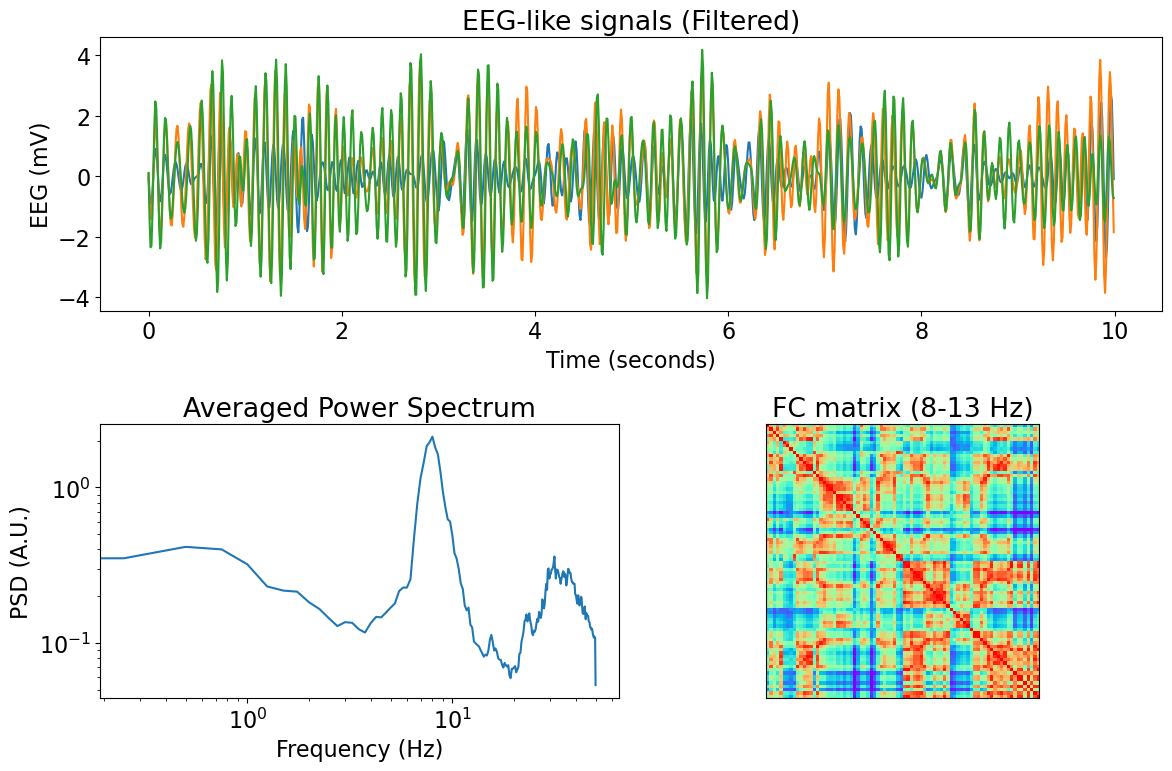

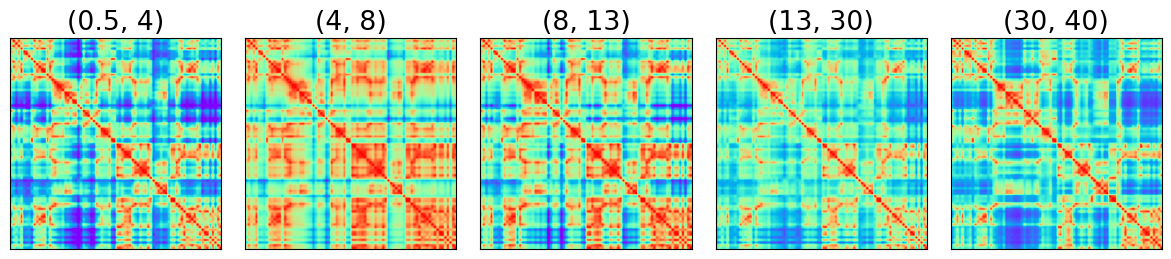

In [17]:
###some plots

plt.figure(1, figsize = (12,8))
plt.clf()

plt.subplot(2,1,1)
plt.plot(t[:1000], Vfilt[:1000,[0,15,78]])
plt.xlabel('Time (seconds)')
plt.ylabel('EEG (mV)')
plt.title('EEG-like signals (Filtered)')

plt.subplot(2,2,3)
plt.loglog(freqs,PSD)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (A.U.)')
plt.title('Averaged Power Spectrum')

plt.subplot(2,2,4)
plt.imshow(FC, vmin = 0, vmax = 1, cmap = 'rainbow')
plt.xticks([])
plt.yticks([])
plt.title('FC matrix (8-13 Hz)')

plt.tight_layout()

plt.figure(2, figsize = (12,8))
plt.clf()
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(FCs[:,:,i], vmin = 0, vmax = 1, cmap = 'rainbow')
    plt.xticks([])
    plt.yticks([])
    plt.title(bands[i])
    
plt.tight_layout()



    
    

## How FC changes with global coupling

In [18]:
#Simulations parameters
JR.tmax = 30 #max sim time
JR.teq = 5 #eq time for reaching steady-state dynamics
JR.dt = 0.001 #integration step
JR.downsamp = 10 #downsampling for reducing memory consumption

###HERE WE ARE CHANGING THE GLOBAL COUPLING PARAMETER
K_vec = np.linspace(0, 0.5, 11) #coupling values
FCs = np.zeros((82,82,11)) #for storing FC matrices
mean_corrs = np.zeros(11) #mean_corrs = mean values of FC matrices

for i in range(0,11):
    
    JR.K = K_vec[i] #Global Coupling

    #Simulation starts here
    y, t = JR.Sim(verbose = False)
    #Simulations end here

    #EEG-like signals
    EEG = (JR.alpha * y[:,1,:] + JR.gamma * y[:,7,:]) - (JR.alpha * y[:,2,:] + JR.gamma * y[:,8,:])

    #filtering and computing FC
    fmin, fmax = 8, 13
    a0,b0 = signal.bessel(3, 2 * JR.dt * JR.downsamp * np.array([fmin, fmax]), btype = 'bandpass')

    Vfilt = signal.filtfilt(a0, b0, EEG, 0) #filtered signals
    FC = np.corrcoef(Vfilt.T) #Functional connectivity
    FCs[:,:,i] = FC.copy() #storing
    mean_corrs[i] = np.mean(FC) #more storing...
    
    print(i) #tic toc


0
1
2
3
4
5
6
7
8
9
10


## Plotting

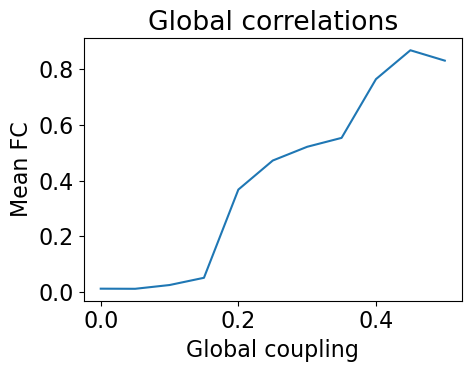

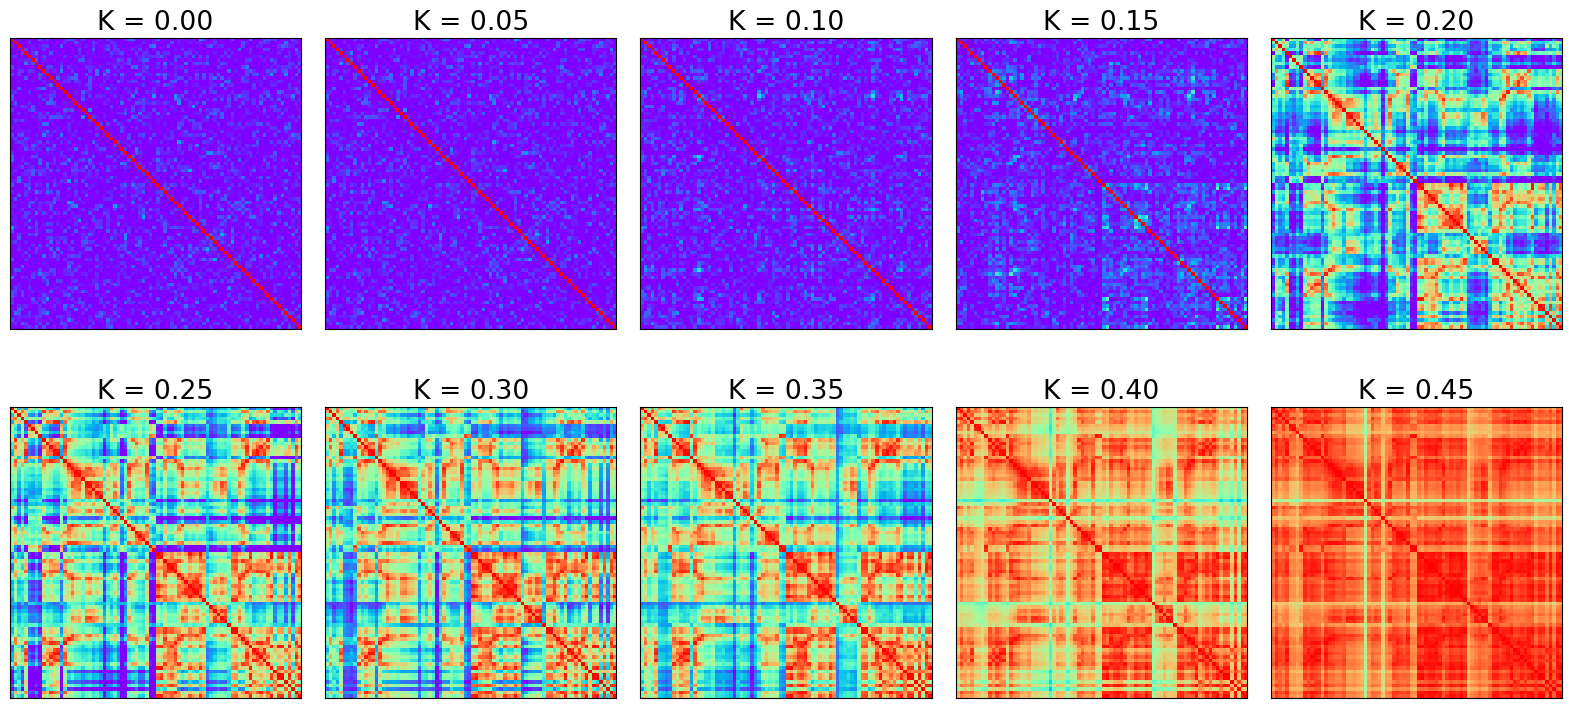

In [19]:
#some plots

plt.figure(1, figsize = (5,4))
plt.clf()

plt.plot(K_vec, mean_corrs)
plt.xlabel('Global coupling')
plt.ylabel('Mean FC')
plt.title('Global correlations')

plt.tight_layout()

plt.figure(2, figsize = (16,8))
plt.clf()

for i in range(0, 10):
    plt.subplot(2,5,i+1)
    plt.imshow(FCs[:,:,i], vmin = 0, vmax = 1, cmap = 'rainbow')
    plt.xticks([])
    plt.yticks([])
    plt.title('K = %.2f'%K_vec[i])
    
plt.tight_layout()

